# Advanced Regression Assignment
### Predicting Price of House and decide whether to invest
### (Usage of Linear Regression and Regularization)

### Student: Karthik Jayaraman

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. 

The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to 
predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know:
* Which variables are significant in predicting the price of a house, and 
* How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. 

This model will then be used by the management to understand how exactly the prices vary with the variables. 

They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Step 1: Import Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm #for add the constant value
from sklearn.preprocessing import MinMaxScaler #for performing minmax scaling on the continous variables of training data
from sklearn.model_selection import train_test_split #for spliting the data in terms of train and test

from statsmodels.stats.outliers_influence import variance_inflation_factor #to calculate the VIF
from sklearn.metrics import mean_squared_error #for calculating the mean squared error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# reading the dataset
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [4]:
# Summary of Australian housing market dataset: 1460 rows, 81 columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Step 2: Initial analysis of the dataset

In [6]:
#Check for missing values & display all rows
def check_missing_vals(x):
    pd.set_option('display.max_rows', None)
    print(x.isnull().mean().sort_values(ascending=False))

In [7]:
#Check for missing values & display all rows
check_missing_vals(df)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageCond       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
GrLivArea        0.000000
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea    

In [8]:
# Remove columns in-place with greater than (>) 33% missing values
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [9]:
# Summary of Australian housing market dataset: 1460 rows, 76 columns
df.shape

(1460, 76)

In [10]:
#Check for missing values & display all rows
check_missing_vals(df)

LotFrontage      0.177397
GarageType       0.055479
GarageCond       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
PavedDrive       0.000000
WoodDeckSF       0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
SaleCondition    0.000000
BedroomAbvGr     0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
PoolArea         0.000000
ScreenPorch      0.000000
Functional       0.000000
Fireplaces       0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
GarageCars  

### Observed there are missing values in following columns

```
# LotFrontage      0.177397
    LotFrontage: Linear feet of street connected to property

# GarageType       0.055479
    GarageType: Garage location
    NA	No Garage
    
# GarageCond       0.055479
    GarageCond: Garage condition
    NA	No Garage
    
# GarageYrBlt      0.055479
    GarageYrBlt: Year garage was built
    
# GarageFinish     0.055479
    GarageFinish: Interior finish of the garage
    NA	No Garage
    
# GarageQual       0.055479
    GarageQual: Garage quality
    NA	No Garage
    
# BsmtFinType2     0.026027
    BsmtFinType2: Rating of basement finished area (if multiple types)
    NA	No Basement
    
# BsmtExposure     0.026027
    BsmtExposure: Refers to walkout or garden level walls
    NA	No Basement
    
# BsmtFinType1     0.025342
    BsmtFinType1: Rating of basement finished area
    NA	No Basement
    
# BsmtCond         0.025342
    BsmtCond: Evaluates the general condition of the basement
    NA	No Basement

# BsmtQual         0.025342
    BsmtQual: Evaluates the height of the basement
    NA	No Basement
    
# MasVnrArea       0.005479
    MasVnrArea: Masonry veneer area in square feet

# MasVnrType       0.005479
    MasVnrType: Masonry veneer type
    None	None
    
# Electrical       0.000685
    Electrical: Electrical system
       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
```

In [11]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df['GarageType'].fillna("None", inplace=True)
df['GarageCond'].fillna("None", inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["GarageFinish"].fillna("None", inplace=True)
df["GarageQual"].fillna("None", inplace=True)
df["BsmtFinType2"].fillna("None", inplace=True)
df["BsmtExposure"].fillna("None", inplace=True)
df["BsmtFinType1"].fillna("None", inplace=True)
df["BsmtCond"].fillna("None", inplace=True)
df["BsmtQual"].fillna("None", inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["MasVnrType"].fillna("None", inplace=True)
df["Electrical"].fillna(df['Electrical'].mode()[0], inplace=True)

In [12]:
#Check for missing values & display all rows
check_missing_vals(df)

Id               0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
BsmtHalfBath     0.0
MSSubClass       0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
YearBuilt        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

### Observation: There are no missing values as observed

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

### Observation: There are no duplicate row as observed

## Step 3: Exploratory Data analysis

In [14]:
def find_column_types(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    numeric_cols = df.select_dtypes(exclude=['object']).columns
    return (categorical_cols, numeric_cols) 

In [15]:
def check_frequency(series):
    counts = series.value_counts(normalize=True)
    return counts.iloc[0] > 0.90

### Derived columns

In [16]:
# From the nummeric columns
## a. Identify and Compact columns to derive new columns and drop existing ones
## b. Identify redundant columns not needed and drop them

In [17]:
df['TotalAreaSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'] + df['GarageArea'] + df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['PoolArea']
df['TotalOutdoorAreaSF'] = df['GarageArea'] + df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['PoolArea']


In [18]:
redundant_area_cols = ['1stFlrSF','2ndFlrSF','TotalBsmtSF','GarageArea','WoodDeckSF',
                       'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
print(df.shape)
df.drop(redundant_area_cols, axis=1, inplace=True)
print(df.shape)

(1460, 78)
(1460, 68)


In [19]:
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])


In [20]:
redundant_BR_cols = ['FullBath', 'HalfBath','BsmtFullBath','BsmtHalfBath']
print(df.shape)
df.drop(redundant_BR_cols, axis=1, inplace=True)
print(df.shape)

(1460, 69)
(1460, 65)


In [21]:
cols_to_drop = df.apply(check_frequency)
print(cols_to_drop)

Id                    False
MSSubClass            False
MSZoning              False
LotFrontage           False
LotArea               False
Street                 True
LotShape              False
LandContour           False
Utilities              True
LotConfig             False
LandSlope              True
Neighborhood          False
Condition1            False
Condition2             True
BldgType              False
HouseStyle            False
OverallQual           False
OverallCond           False
YearBuilt             False
YearRemodAdd          False
RoofStyle             False
RoofMatl               True
Exterior1st           False
Exterior2nd           False
MasVnrType            False
MasVnrArea            False
ExterQual             False
ExterCond             False
Foundation            False
BsmtQual              False
BsmtCond              False
BsmtExposure          False
BsmtFinType1          False
BsmtFinSF1            False
BsmtFinType2          False
BsmtFinSF2          

In [22]:
df = df.loc[:, ~cols_to_drop]

In [23]:
df.drop(['Id'], axis=1, inplace=True)

In [24]:
print(df.shape)

(1460, 50)


In [25]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'GrLivArea', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'TotalAreaSF',
       'TotalOutdoorAreaSF', 'TotalBathrooms'],
      dtype='object')

In [26]:
#Property age
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']
df['TotalAge']=df['YrSold']-df['YearBuilt']
df.drop(labels = ['YearRemodAdd','GarageYrBlt'], axis = 1, inplace=True)
print(df.shape)

(1460, 51)


In [27]:
categorical_cols, numeric_cols= find_column_types(df)
numeric_catgeory_cols = df[['MSSubClass', 'OverallQual', 'OverallCond']].columns
numeric_cols = numeric_cols.drop(['MSSubClass', 'OverallQual', 'OverallCond'])

print(df.shape)
print(len(categorical_cols))
print(len(numeric_catgeory_cols))
print(len(numeric_cols))

(1460, 51)
27
3
21


## Step 4: Data Visualization & Inference

### Numeric variables


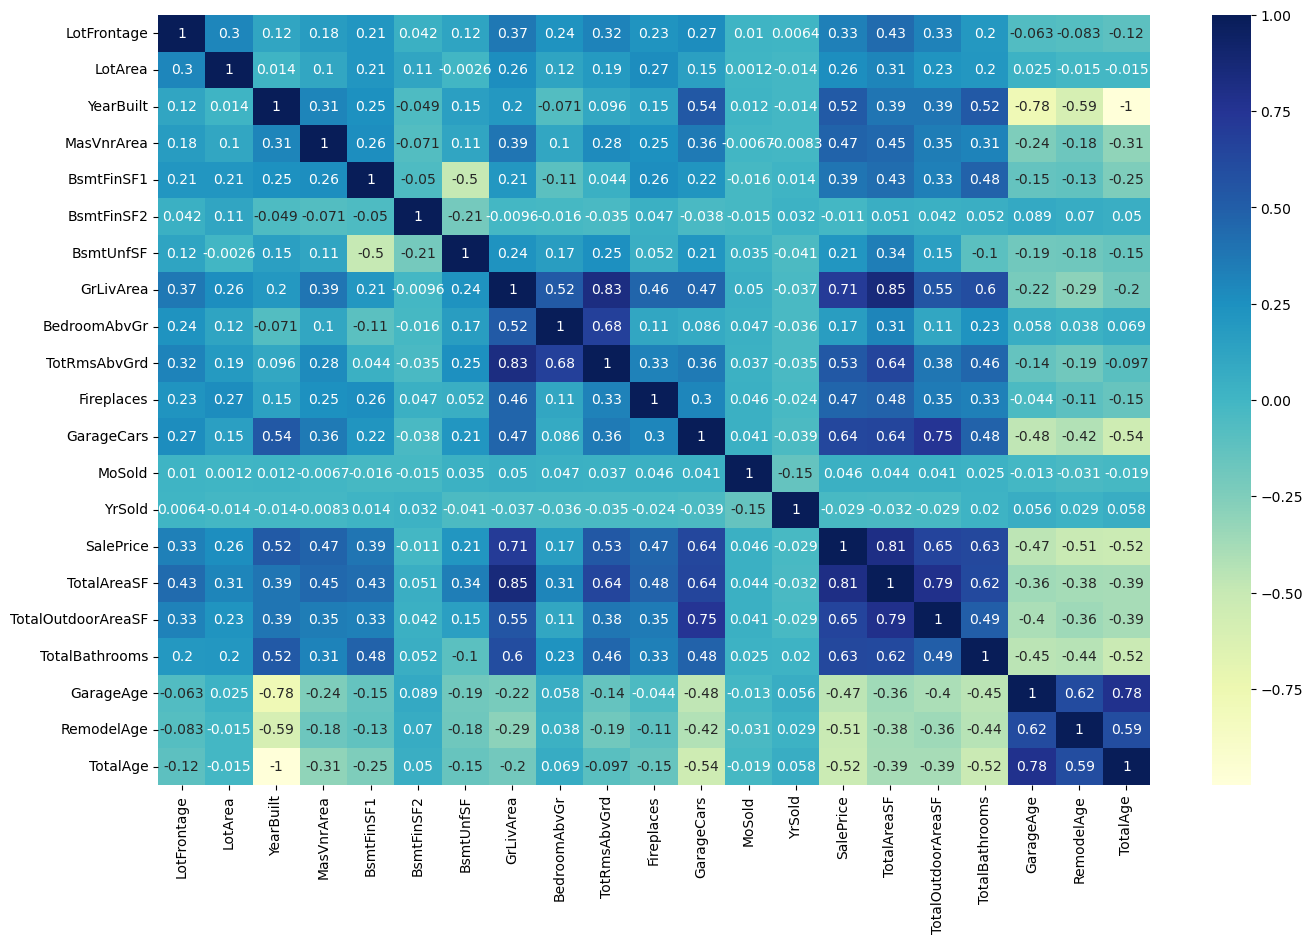

In [28]:
#Correlation heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df[numeric_cols.tolist()].corr(), annot = True, cmap="YlGnBu")
plt.show()

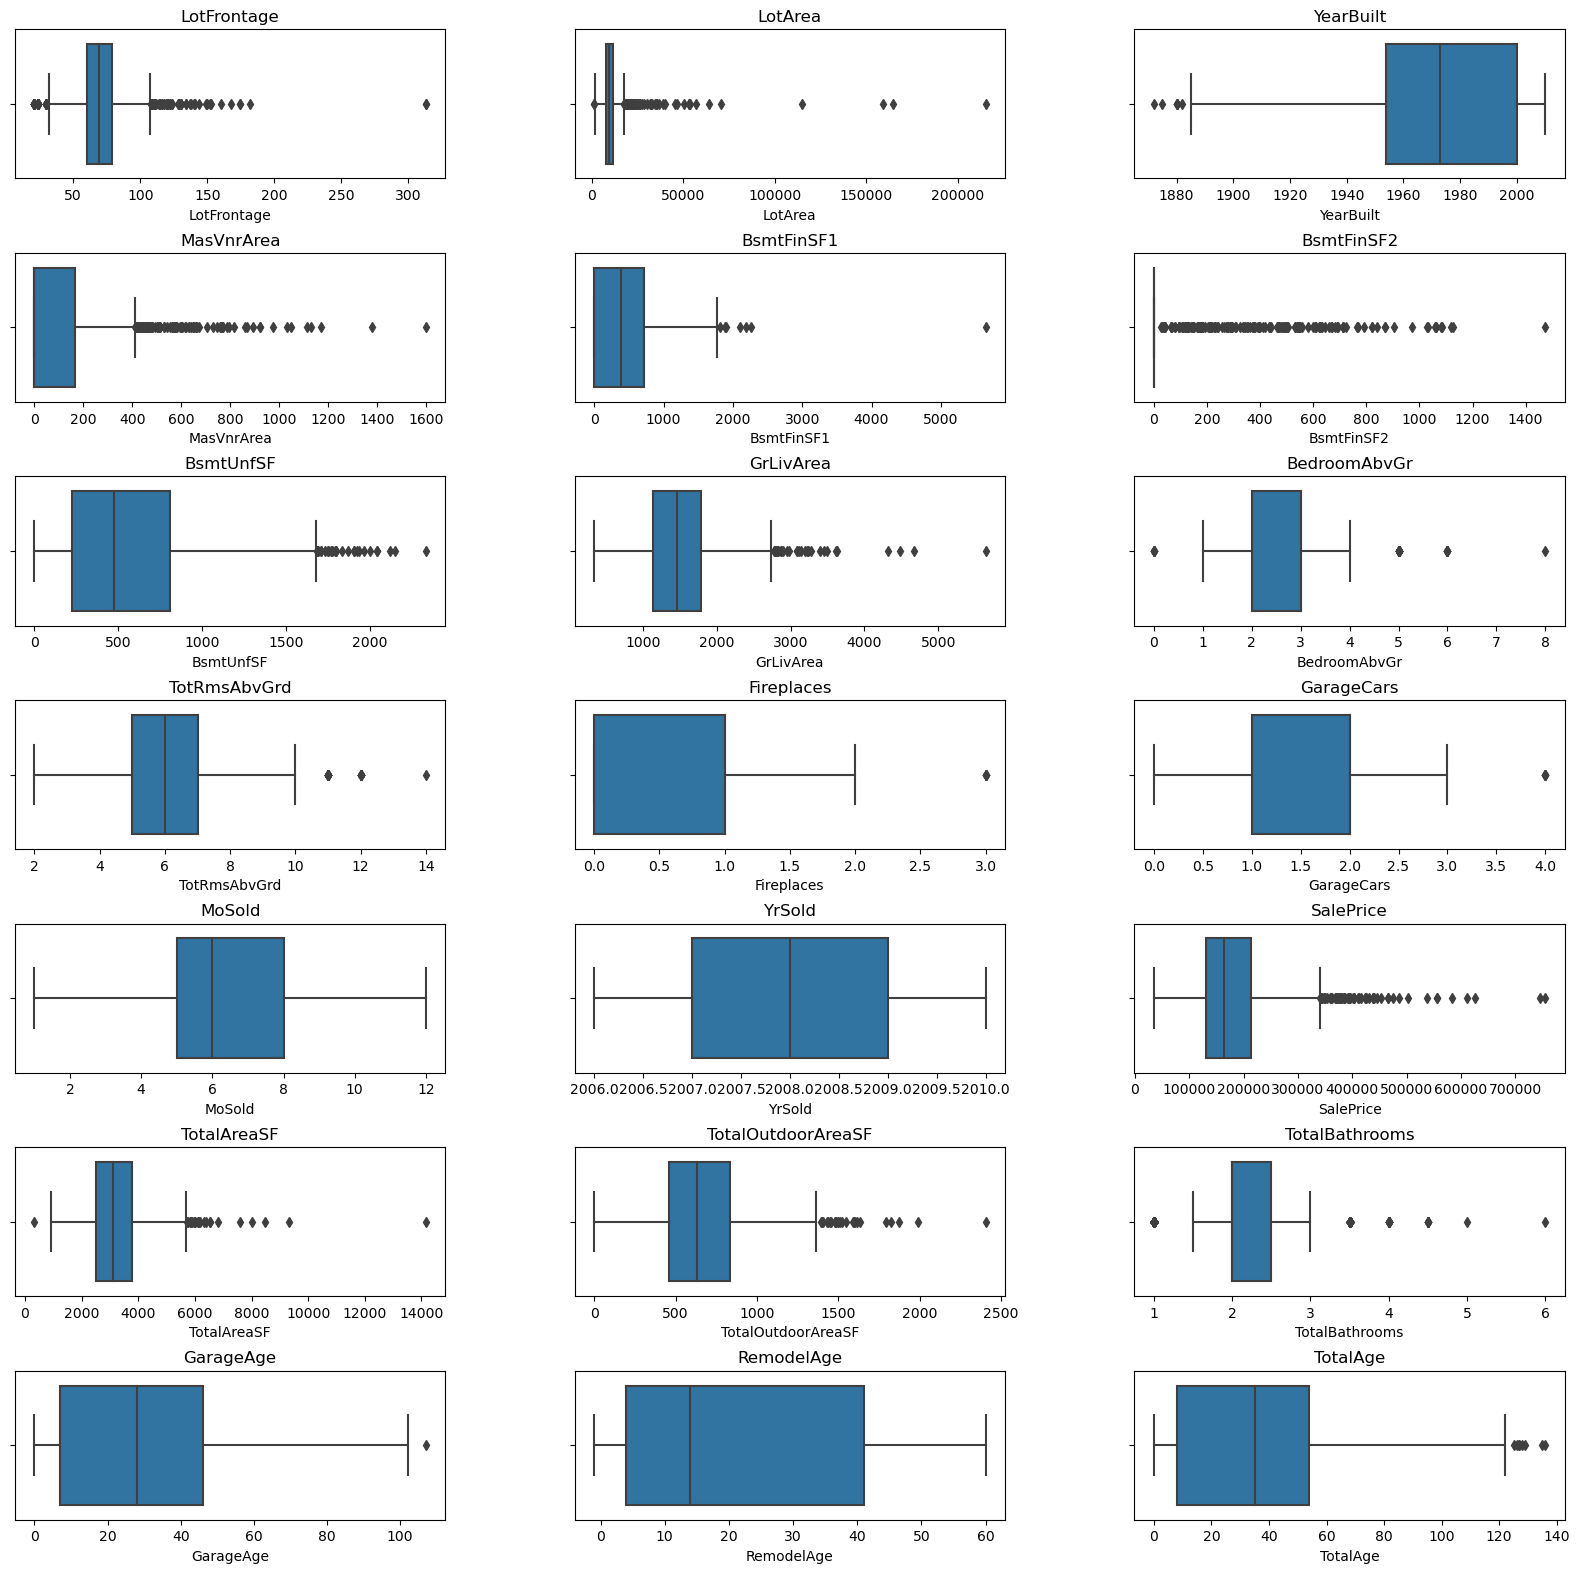

In [29]:
#Box plot visualization - OUTLIERS
plt.figure(figsize=(20, 60), dpi=100)

idx = 0
for col in numeric_cols:
    idx = idx + 1
    plt.subplot(21,3,idx)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=12)


plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [30]:
# Function to remove lower threshold values & return new dataframe
def remove_upper_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    #Inter Quartile Range
    IQR = Q3 - Q1
    return df[~((df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
df = remove_upper_outliers(df, ['LotFrontage','LotArea','MasVnrArea','GrLivArea'])

In [32]:
df.shape

(1253, 51)

### Categorical variables


In [33]:
#Box plot visualization - OUTLIERS
plt.figure(figsize=(30, 120), dpi=300)
sns.set(font_scale=2)
idx = 0
for col in categorical_cols:
    idx = idx + 1
    plt.subplot(14,2,idx)
    sns.barplot(x = col, y = 'SalePrice', data = df)
    plt.title(col, fontsize=20)
    plt.xticks(rotation=45)
    
#plt.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace=0.6)
plt.show()

In [34]:
correlation_matrix = df.corr()
higher_corr = correlation_matrix['SalePrice'][(correlation_matrix['SalePrice'] > 0.5) | (correlation_matrix['SalePrice'] < -0.5)]
print(higher_corr.sort_values(ascending=False))

SalePrice             1.000000
TotalAreaSF           0.833611
OverallQual           0.806687
GrLivArea             0.675808
TotalOutdoorAreaSF    0.649681
GarageCars            0.645054
TotalBathrooms        0.626582
YearBuilt             0.596892
GarageAge            -0.509911
RemodelAge           -0.557049
TotalAge             -0.596704
Name: SalePrice, dtype: float64


### Observations

- Categorical columns 'OverallQual' have strong positive correlation with Sale Price
 
- Numeric columns - TotalAreaSF, GrLivArea(Above grade (ground) living area square feet),
   TotalOutdoorAreaSF, GarageCars and TotalBathrooms have strong positive
   correlation with Sale Price

## Step 5: Data Preparation

In [35]:
df[categorical_cols] = df[categorical_cols].astype('category')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1253 non-null   int64   
 1   MSZoning            1253 non-null   category
 2   LotFrontage         1253 non-null   float64 
 3   LotArea             1253 non-null   int64   
 4   LotShape            1253 non-null   category
 5   LandContour         1253 non-null   category
 6   LotConfig           1253 non-null   category
 7   Neighborhood        1253 non-null   category
 8   Condition1          1253 non-null   category
 9   BldgType            1253 non-null   category
 10  HouseStyle          1253 non-null   category
 11  OverallQual         1253 non-null   int64   
 12  OverallCond         1253 non-null   int64   
 13  YearBuilt           1253 non-null   int64   
 14  RoofStyle           1253 non-null   category
 15  Exterior1st         1253 non-null   ca

In [37]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Columns: 187 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(20), uint8(163)
memory usage: 444.2 KB


In [38]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  GrLivArea  BedroomAbvGr  \
0       196.0         706           0        150       1710             3   
1         0.0         978           0        284       1262             3   
2       162.0         486           0        434       1786             3   
3         0.0         216           0        540       1717             3   
4       350.0         655           0        490       2198             4   

   TotRmsAbvGrd  Fireplaces  GarageCars  MoSold  YrSold  SalePrice  \
0             8           0           2       2    2008     208500   
1             6           1           2       5    2007     181500   
2             6           1           2       9    2008     223500   
3             7           1           3       2    2006     140000   
4             9           1           3      12    2008     250000   

   TotalAreaSF  TotalOutdoorAreaSF  TotalBathrooms  GarageAge  RemodelAge  \
0         3175                 609             3.5        5.0           5   
1         3282                 758             2.5       31.0          31   
2         3356                 650             3.5        7.0           6   
3         3422                 949             2.0        8.0          36   
4         4455                1112             3.5        8.0           8   

   TotalAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0         5            0            0            1            0             0   
1        31            0            0            1            0             0   
2         7            0            0            1            0             0   
3        91            0            0            1            0             0   
4         8            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 1                     0                    0   
1                 0                     0                    0   
2                 1                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhoo

In [39]:
numeric_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'SalePrice',
       'TotalAreaSF', 'TotalOutdoorAreaSF', 'TotalBathrooms', 'GarageAge',
       'RemodelAge', 'TotalAge'],
      dtype='object')

In [40]:
numeric_catgeory_cols

Index(['MSSubClass', 'OverallQual', 'OverallCond'], dtype='object')

In [41]:
numeric_for_scaling = numeric_cols.tolist() + numeric_catgeory_cols.tolist()

In [42]:
# Numeric variables for scaling
numeric_for_scaling

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'GrLivArea',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold',
 'SalePrice',
 'TotalAreaSF',
 'TotalOutdoorAreaSF',
 'TotalBathrooms',
 'GarageAge',
 'RemodelAge',
 'TotalAge',
 'MSSubClass',
 'OverallQual',
 'OverallCond']

In [43]:
## Featue Scaling
Scaler = MinMaxScaler() 
df[numeric_for_scaling] = Scaler.fit_transform(df[numeric_for_scaling])

In [44]:
df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.511628  0.438650     0.666667        0.500   0.949275   
1    0.000000     0.686047  0.509202     0.555556        0.875   0.753623   
2    0.235294     0.546512  0.610429     0.666667        0.500   0.934783   
3    0.294118     0.453488  0.506135     0.666667        0.500   0.311594   
4    0.235294     0.732558  0.795092     0.777778        0.500   0.927536   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  GrLivArea  BedroomAbvGr  \
0    0.478049    0.399547         0.0   0.070721   0.574290      0.500000   
1    0.000000    0.553480         0.0   0.133899   0.387312      0.500000   
2    0.395122    0.275042         0.0   0.204620   0.606010      0.500000   
3    0.000000    0.122241         0.0   0.254597   0.577212      0.500000   
4    0.853659    0.370685         0.0   0.231023   0.777963      0.666667   

   TotRmsAbvGrd  Fireplaces  GarageCars    MoSold  YrSold  SalePrice  \
0           0.6    0.000000        0.50  0.090909    0.50   0.333782   
1           0.4    0.333333        0.50  0.363636    0.25   0.281869   
2           0.4    0.333333        0.50  0.727273    0.50   0.362623   
3           0.5    0.333333        0.75  0.090909    0.00   0.202077   
4           0.7    0.333333        0.75  1.000000    0.50   0.413574   

   TotalAreaSF  TotalOutdoorAreaSF  TotalBathrooms  GarageAge  RemodelAge  \
0     0.467577            0.411486             0.5   0.046729    0.083333   
1     0.485188            0.512162             0.3   0.289720    0.516667   
2     0.497367            0.439189             0.5   0.065421    0.100000   
3     0.508229            0.641216             0.2   0.074766    0.600000   
4     0.678242            0.751351             0.5   0.074766    0.133333   

   TotalAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0  0.036765            0            0            1            0             0   
1  0.227941            0            0            1            0             0   
2  0.051471            0            0            1            0             0   
3  0.669118            0            0            1            0             0   
4  0.058824            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 1                     0                    0   
1                 0                     0                    0   
2                 1                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Ed

In [45]:
df[numeric_for_scaling].describe()

LotFrontage      LotArea    YearBuilt   MasVnrArea   BsmtFinSF1  \
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000   
mean      0.528462     0.474094     0.710058     0.159134     0.231395   
std       0.186559     0.188844     0.219808     0.255402     0.226724   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.453488     0.362393     0.572464     0.000000     0.000000   
50%       0.558140     0.477546     0.717391     0.000000     0.206565   
75%       0.627907     0.582822     0.927536     0.275610     0.384833   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        BsmtFinSF2    BsmtUnfSF    GrLivArea  BedroomAbvGr  TotRmsAbvGrd  \
count  1253.000000  1253.000000  1253.000000   1253.000000   1253.000000   
mean      0.030513     0.259728     0.458451      0.472599      0.434637   
std       0.106396     0.199064     0.179789      0.131055      0.149110   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.101839     0.318447      0.333333      0.300000   
50%       0.000000     0.221594     0.442404      0.500000      0.400000   
75%       0.000000     0.371523     0.573873      0.500000      0.500000   
max       1.000000     1.000000     1.000000      1.000000      1.000000   

        Fireplaces   GarageCars       MoSold       YrSold    SalePrice  \
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000   
mean      0.179835     0.422386     0.487630     0.455906     0.256271   
std       0.206242     0.184004     0.245897     0.332302     0.121375   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.250000     0.363636     0.250000     0.177081   
50%       0.000000     0.500000     0.454545     0.500000     0.230917   
75%       0.333333     0.500000     0.636364     0.750000     0.312632   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       TotalAreaSF  TotalOutdoorAreaSF  TotalBathrooms    GarageAge  \
count  1253.000000         1253.000000     1253.000000  1253.000000   
mean      0.446702            0.416154        0.226417     0.281254   
std       0.139402            0.181467        0.151551     0.226007   
min       0.000000            0.000000        0.000000     0.000000   
25%       0.347597            0.297973        0.100000     0.074766   
50%       0.433509            0.411486        0.200000     0.261682   
75%       0.533410            0.531081        0.300000     0.429907   
max       1.000000            1.000000        1.000000     1.000000   

        RemodelAge     TotalAge   MSSubClass  OverallQual  OverallCond  
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000  
mean      0.395345     0.278203     0.219802     0.550412     0.575319  
std       0.347451     0.223392     0.252066     0.144630     0.139981  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.066667     0.058824     0.000000     0.444444     0.500000  
50%       0.266667     0.264706     0.176471     0.555556     0.500000  
75%       0.700000     0.419118     0.294118     0.666667     0.625000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

### Split dataset into Train and Test data

In [46]:
# Split into train and test
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [47]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [48]:
#Shape of Train dataset
print(df.shape)

#Shape of Train dataset
print(df_train.shape)

#Shape of Test dataset
print(df_test.shape)

(1253, 187)
(877, 186)
(376, 186)


## Step 6: Model Training

In [49]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=93) # running RFE
rfe = rfe.fit(X_train, y_train)


In [50]:
#Sort all according to rank (Same rank indicates equal importance)
sorted(zip(X_train.columns, rfe.support_, rfe.ranking_), key=lambda x: x[2])

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('GarageCars', True, 1),
 ('YrSold', True, 1),
 ('TotalAreaSF', True, 1),
 ('TotalOutdoorAreaSF', True, 1),
 ('TotalBathrooms', True, 1),
 ('GarageAge', True, 1),
 ('TotalAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LandContour_HLS', True, 1),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_MeadowV', True, 1),
 ('Neighborhood_Mitchel', True, 1),
 ('Neighborhood_NPkVill', True, 1),
 ('Neighborhood_NWAmes', True, 1),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_OldTown', True, 1),
 ('Neighborhood_Somerst', True, 1),
 ('Neighborhood_StoneBr', True, 1),
 ('Condition1_PosA', True, 1),
 ('C

In [51]:
# List of selected variables by RFE
rfe_select_col = X_train.columns[rfe.support_]
rfe_select_col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'GrLivArea', 'BedroomAbvGr', 'GarageCars', 'YrSold',
       'TotalAreaSF', 'TotalOutdoorAreaSF', 'TotalBathrooms', 'GarageAge',
       'TotalAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_HLS', 'Neighborhood_Blueste', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_PosA', 'Condition1_RRAe',
       'Condition1_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock

In [52]:
#Calculate Variance Inflation factor (to detect multicollinearity)
def VIF(X):
    vif = pd.DataFrame()
    #X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [53]:
#Calculate P-value (Feature significance)
def print_sorted_pvalue(X):
    # Get the summary as a DataFrame
    summary_df = pd.read_html(X.summary().tables[1].as_html(), header=0, index_col=0)[0]

    # Sort by the p-value
    sorted_summary = summary_df.sort_values('P>|t|', ascending=False)

    # Print the sorted summary
    print(sorted_summary)

In [54]:
# Creating X_train_rfe dataframe with selected variables by RFE
X_train_rfe = X_train[rfe_select_col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [55]:
#Running the Linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [56]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     147.9
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:51:41   Log-Likelihood:                 1829.1
No. Observations:                 877   AIC:                            -3488.
Df Residuals:                     792   BIC:                            -3082.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [57]:
# Calculate VIFs of X_train_new
VIF(X_train_rfe)

Features    VIF
72      BsmtFinType1_None    inf
15               TotalAge    inf
68          BsmtCond_None    inf
66          BsmtQual_None    inf
4               YearBuilt    inf
55     Exterior2nd_CBlock    inf
48     Exterior1st_CBlock    inf
85        GarageType_None    inf
86      GarageFinish_None    inf
88        GarageQual_None    inf
10                 YrSold    inf
91           SaleType_New  68.95
93  SaleCondition_Partial  68.67
41        RoofStyle_Gable  41.78
52    Exterior1st_VinylSd  39.70
60    Exterior2nd_VinylSd  39.67
43          RoofStyle_Hip  39.22
76      BsmtFinType2_None  39.04
70      BsmtExposure_None  32.37
18            MSZoning_RL  24.21
63           ExterQual_TA  23.50
62           ExterQual_Gd  19.47
78       BsmtFinType2_Unf  19.07
19            MSZoning_RM  19.03
11            TotalAreaSF  15.95
67            BsmtQual_TA  12.78
82         KitchenQual_TA  10.96
16            MSZoning_FV  10.51
65            BsmtQual_Gd   9.77
7               GrLivArea   9.69
81         KitchenQual_Gd   8.88
12     TotalOutdoorAreaSF   5.67
31   Neighborhood_Somerst   5.19
9              GarageCars   4.89
75       BsmtFinType2_LwQ   4.73
14              GarageAge   4.35
77       BsmtFinType2_Rec   4.23
2             OverallQual   4.00
6              BsmtFinSF2   4.00
13         TotalBathrooms   3.36
42      RoofStyle_Gambrel   3.26
73       BsmtFinType2_BLQ   3.18
61           ExterQual_Fa   2.99
80         KitchenQual_Fa   2.71
47    Exterior1st_BrkFace   2.58
59     Exterior2nd_Stucco   2.58
64            BsmtQual_Fa   2.52
54    Exterior2nd_BrkFace   2.49
17            MSZoning_RH   2.47
1                 LotArea   2.45
8            BedroomAbvGr   2.41
5              BsmtFinSF1   2.41
51     Exterior1st_Stucco   2.41
44      RoofStyle_Mansard   2.35
56    Exterior2nd_CmentBd   2.28
30   Neighborhood_OldTown   2.26
24   Neighborhood_MeadowV   2.19
53    Exterior2nd_AsphShn   2.18
38        BldgType_TwnhsE   2.18
45    Exterior1st_AsphShn   1.82
37         BldgType_Twnhs   1.80
74       BsmtFinType2_GLQ   1.80
29   Neighborhood_NridgHt   1.75
35        Condition1_RRNn   1.67
36        BldgType_Duplex   1.65
3             OverallCond   1.58
22   Neighborhood_Crawfor   1.50
46    Exterior1st_BrkComm   1.49
69        BsmtExposure_Gd   1.48
32   Neighborhood_StoneBr   1.42
58      Exterior2nd_Other   1.40
57    Exterior2nd_ImStucc   1.39
84     GarageType_BuiltIn   1.33
23   Neighborhood_Edwards   1.32
27    Neighborhood_NWAmes   1.30
34        Condition1_RRAe   1.26
71       BsmtFinType1_LwQ   1.24
25   Neighborhood_Mitchel   1.23
92  SaleCondition_AdjLand   1.23
40      HouseStyle_2.5Unf   1.21
20        LandContour_HLS   1.20
79           HeatingQC_Po   1.19
39      HouseStyle_2.5Fin   1.17
83     GarageType_Basment   1.16
26   Neighborhood_NPkVill   1.16
33        Condition1_PosA   1.13
28   Neighborhood_NoRidge   1.12
87          GarageQual_Gd   1.10
89          GarageQual_Po   1.10
90           SaleType_Con   1.07
0                   const   0.00
21   Neighborhood_Blueste    NaN
49    Exterior1st_ImStucc    NaN
50      Exterior1st_Stone    NaN

In [58]:
# Sort P-values
print_sorted_pvalue(lm)

                               coef       std err      t  P>|t|        [0.025  \
Exterior1st_CBlock    -2.900000e-03  1.800000e-02 -0.162  0.871 -3.800000e-02   
Exterior2nd_CBlock    -2.900000e-03  1.800000e-02 -0.162  0.871 -3.800000e-02   
const                 -6.700000e-03  2.100000e-02 -0.317  0.751 -4.800000e-02   
Exterior1st_AsphShn    2.480000e-02  4.300000e-02  0.580  0.562 -5.900000e-02   
YrSold                 2.000000e-03  3.000000e-03  0.587  0.557 -5.000000e-03   
BsmtQual_None          1.090000e-02  1.600000e-02  0.673  0.501 -2.100000e-02   
BsmtCond_None          1.090000e-02  1.600000e-02  0.673  0.501 -2.100000e-02   
BsmtFinType1_None      1.090000e-02  1.600000e-02  0.673  0.501 -2.100000e-02   
BsmtExposure_None     -2.280000e-02  3.200000e-02 -0.713  0.476 -8.500000e-02   
Neighborhood_NPkVill   1.540000e-02  1.500000e-02  1.011  0.312 -1.500000e-02   
Exterior2nd_BrkFace   -1.230000e-02  1.200000e-02 -1.039  0.299 -3.600000e-02   
HouseStyle_2.5Unf     -1.380

In [59]:
X_test_rfe = X_test[rfe_select_col]
X_test_rfe = sm.add_constant(X_test_rfe)

In [60]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("The R-Squared value of train data")
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("The R-Squared value of test data")
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("The RSS value based on actual and predicted train data")
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("The RSS value based on actual and predicted test data")
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("The MSE - Mean Squared value based on actual and predicted train data")
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("The  MSE - Mean Squared value based on actual and predicted test data")
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

metric.append(len(lm.params))

The R-Squared value of train data
0.9400774685060646
The R-Squared value of test data
0.8828063108060681
The RSS value based on actual and predicted train data
0.7923655936382091
The RSS value based on actual and predicted test data
0.6118790971362511
The MSE - Mean Squared value based on actual and predicted train data
0.0009034955457676273
The  MSE - Mean Squared value based on actual and predicted test data
0.0016273380242985403


In [61]:
lm.params

const                   -6.684141e-03
LotArea                  3.499199e-02
OverallQual              1.413941e-01
OverallCond              8.754239e-02
YearBuilt                4.874044e-02
BsmtFinSF1               5.535358e-02
BsmtFinSF2               2.657994e-02
GrLivArea                1.275976e-01
BedroomAbvGr            -4.987233e-02
GarageCars               2.731402e-02
YrSold                   1.997492e-03
TotalAreaSF              2.482920e-01
TotalOutdoorAreaSF      -2.946995e-02
TotalBathrooms           1.657372e-02
GarageAge               -1.771914e-02
TotalAge                -5.598431e-02
MSZoning_FV              5.980228e-02
MSZoning_RH              4.699132e-02
MSZoning_RL              5.203969e-02
MSZoning_RM              5.647552e-02
LandContour_HLS          1.696666e-02
Neighborhood_Blueste    -1.442113e-16
Neighborhood_Crawfor     5.878790e-02
Neighborhood_Edwards    -1.622943e-02
Neighborhood_MeadowV    -2.845268e-02
Neighborhood_Mitchel    -1.948605e-02
Neighborhood

## Ridge Regression

In [62]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [64]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

ridgemodel_df = pd.DataFrame()
ridgemodel_df["Feature"] = ridge.feature_names_in_
ridgemodel_df["Coefficient"] = ridge.coef_
ridgemodel_df = ridgemodel_df.loc[(ridgemodel_df['Coefficient']!=0) | (ridgemodel_df['Feature']== 'const')]

ridgemodel_df


Feature  Coefficient
0               MSSubClass    -0.025831
1              LotFrontage     0.014562
2                  LotArea     0.038908
3              OverallQual     0.110646
4              OverallCond     0.070873
5                YearBuilt     0.034632
6               MasVnrArea     0.010585
7               BsmtFinSF1     0.081089
8               BsmtFinSF2     0.035161
9                BsmtUnfSF     0.043404
10               GrLivArea     0.120179
11            BedroomAbvGr    -0.021432
12            TotRmsAbvGrd     0.020323
13              Fireplaces     0.023864
14              GarageCars     0.025742
15                  MoSold     0.001258
16                  YrSold    -0.000496
17             TotalAreaSF     0.102442
18      TotalOutdoorAreaSF     0.016117
19          TotalBathrooms     0.024047
20               GarageAge    -0.007069
21              RemodelAge    -0.013606
22                TotalAge    -0.035156
23             MSZoning_FV     0.031206
24             MSZoning_RH     0.017119
25             MSZoning_RL     0.022991
26             MSZoning_RM     0.019833
27            LotShape_IR2    -0.003200
28            LotShape_IR3     0.002862
29            LotShape_Reg     0.002587
30         LandContour_HLS     0.015076
31         LandContour_Low    -0.004339
32         LandContour_Lvl    -0.000201
33       LotConfig_CulDSac     0.011584
34           LotConfig_FR2    -0.009777
35           LotConfig_FR3    -0.007910
36        LotConfig_Inside    -0.003989
38     Neighborhood_BrDale     0.007942
39    Neighborhood_BrkSide     0.005396
40    Neighborhood_ClearCr    -0.009694
41    Neighborhood_CollgCr    -0.006593
42    Neighborhood_Crawfor     0.045465
43    Neighborhood_Edwards    -0.023129
44    Neighborhood_Gilbert    -0.014477
45     Neighborhood_IDOTRR    -0.013660
46    Neighborhood_MeadowV    -0.022851
47    Neighborhood_Mitchel    -0.023714
48      Neighborhood_NAmes    -0.014264
49    Neighborhood_NPkVill     0.017763
50     Neighborhood_NWAmes    -0.014500
51    Neighborhood_NoRidge     0.022032
52    Neighborhood_NridgHt     0.032571
53    Neighborhood_OldTown    -0.015744
54      Neighborhood_SWISU    -0.005998
55     Neighborhood_Sawyer    -0.008594
56    Neighborhood_SawyerW     0.001596
57    Neighborhood_Somerst     0.022026
58    Neighborhood_StoneBr     0.032622
59     Neighborhood_Timber    -0.012833
60    Neighborhood_Veenker    -0.000181
61        Condition1_Feedr     0.005159
62         Condition1_Norm     0.018104
63         Condition1_PosA     0.026568
64         Condition1_PosN     0.009057
65         Condition1_RRAe    -0.033575
66         Condition1_RRAn     0.008030
67         Condition1_RRNe     0.001477
68         Condition1_RRNn     0.011319
69         BldgType_2fmCon    -0.001836
70         BldgType_Duplex    -0.017018
71          BldgType_Twnhs    -0.022393
72         BldgType_TwnhsE    -0.009491
73       HouseStyle_1.5Unf     0.001037
74       HouseStyle_1Story    -0.005641
75       HouseStyle_2.5Fin    -0.035508
76       HouseStyle_2.5Unf    -0.014590
77       HouseStyle_2Story     0.005970
78       HouseStyle_SFoyer    -0.007513
79         HouseStyle_SLvl    -0.002989
80         RoofStyle_Gable    -0.001113
81       RoofStyle_Gambrel     0.011791
82           RoofStyle_Hip    -0.003050
83       RoofStyle_Mansard     0.023187
84     Exterior1st_AsphShn    -0.000829
85     Exterior1st_BrkComm    -0.001661
86     Exterior1st_BrkFace     0.026038
87      Exterior1st_CBlock    -0.005546
88     Exterior1st_CemntBd    -0.006461
89     Exterior1st_HdBoard    -0.008369
91     Exterior1st_MetalSd     0.000557
92     Exterior1st_Plywood    -0.002447
94      Exterior1st_Stucco     0.024444
95     Exterior1st_VinylSd    -0.019027
96     Exterior1st_Wd Sdng    -0.012926
97     Exterior1st_WdShing    -0.000108
98     Exterior2nd_AsphShn    -0.007618
99     Exterior2nd_Brk Cmn     0.000174
100    Exterior2nd_BrkFace    -0.009900
101     Exterior2nd_CBlock    -0.005546
102    Exterior2nd_

In [65]:
# Metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

metric2.append(len(ridgemodel_df))
print(len(ridgemodel_df))

0.9441497500005274
0.905723144624163
0.7385171385850626
0.4922281869013722
0.0008420947988427167
0.0013091175183547134
183


## Lasso Regression

In [66]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [68]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [69]:
lassomodel_df = pd.DataFrame()
lassomodel_df["Feature"] = lasso.feature_names_in_
lassomodel_df["Coefficient"] = lasso.coef_
lassomodel_df = lassomodel_df.loc[(lassomodel_df['Coefficient']!=0) | (lassomodel_df['Feature']== 'const')]

lassomodel_df

Feature   Coefficient
0               MSSubClass -2.904442e-02
1              LotFrontage  7.262386e-03
2                  LotArea  3.877593e-02
3              OverallQual  1.459933e-01
4              OverallCond  8.655344e-02
5                YearBuilt  5.844415e-02
6               MasVnrArea  6.831594e-03
7               BsmtFinSF1  5.232957e-02
8               BsmtFinSF2  2.039137e-02
10               GrLivArea  1.073348e-01
11            BedroomAbvGr -2.123018e-02
13              Fireplaces  1.538465e-02
14              GarageCars  1.237885e-02
17             TotalAreaSF  2.281843e-01
19          TotalBathrooms  1.195385e-02
20               GarageAge -6.413677e-03
21              RemodelAge -1.026977e-02
22                TotalAge -2.561339e-02
23             MSZoning_FV  1.095145e-02
25             MSZoning_RL  5.584782e-03
29            LotShape_Reg  1.833767e-03
30         LandContour_HLS  1.080672e-02
33       LotConfig_CulDSac  1.155053e-02
34           LotConfig_FR2 -3.489773e-03
36        LotConfig_Inside -1.936422e-03
39    Neighborhood_BrkSide  1.584461e-02
42    Neighborhood_Crawfor  5.363974e-02
43    Neighborhood_Edwards -1.137042e-02
44    Neighborhood_Gilbert -1.008109e-03
46    Neighborhood_MeadowV -8.286871e-03
47    Neighborhood_Mitchel -1.732912e-02
48      Neighborhood_NAmes -4.834858e-03
49    Neighborhood_NPkVill  3.679609e-03
50     Neighborhood_NWAmes -7.473198e-03
51    Neighborhood_NoRidge  2.011318e-02
52    Neighborhood_NridgHt  3.256958e-02
53    Neighborhood_OldTown -3.539534e-03
56    Neighborhood_SawyerW  4.290615e-03
57    Neighborhood_Somerst  2.708423e-02
58    Neighborhood_StoneBr  2.592379e-02
62         Condition1_Norm  1.291218e-02
63         Condition1_PosA  1.246270e-03
65         Condition1_RRAe -3.549193e-02
70         BldgType_Duplex -1.272573e-02
71          BldgType_Twnhs -1.312039e-02
72         BldgType_TwnhsE -6.044442e-04
74       HouseStyle_1Story -3.341377e-03
75       HouseStyle_2.5Fin -2.339784e-02
76       HouseStyle_2.5Unf -1.130403e-02
77       HouseStyle_2Story  5.592504e-03
82           RoofStyle_Hip -3.046715e-03
83       RoofStyle_Mansard  6.966008e-03
86     Exterior1st_BrkFace  1.917956e-02
89     Exterior1st_HdBoard -3.917228e-03
91     Exterior1st_MetalSd  4.124398e-04
94      Exterior1st_Stucco  7.665137e-03
95     Exterior1st_VinylSd -1.261149e-03
96     Exterior1st_Wd Sdng -6.554251e-03
102    Exterior2nd_CmentBd  9.979671e-03
104    Exterior2nd_ImStucc -1.279748e-03
107    Exterior2nd_Plywood -5.534648e-03
111    Exterior2nd_Wd Sdng  2.144710e-03
112    Exterior2nd_Wd Shng -1.067163e-02
114        MasVnrType_None  1.329897e-03
115       MasVnrType_Stone  1.271596e-03
116           ExterQual_Fa -2.888410e-02
117           ExterQual_Gd -2.669304e-02
118           ExterQual_TA -3.429650e-02
120           ExterCond_Gd -5.741569e-03
123      Foundation_CBlock  4.138077e-03
124       Foundation_PConc  9.922304e-03
128            BsmtQual_Fa -2.767572e-02
129            BsmtQual_Gd -4.335831e-02
131            BsmtQual_TA -3.769451e-02
135            BsmtCond_TA  2.907879e-03
136        BsmtExposure_Gd  3.728312e-02
137        BsmtExposure_Mn -5.677364e-04
138        BsmtExposure_No -3.329953e-03
139      BsmtExposure_None -4.659560e-03
140       BsmtFinType1_BLQ  2.427752e-03
141       BsmtFinType1_GLQ  1.275866e-02
142       BsmtFinType1_LwQ -5.272503e-03
145       BsmtFinType1_Unf  1.773598e-03
148       BsmtFinType2_LwQ -1.912085e-03
149      BsmtFinType2_None -2.672565e-03
153           HeatingQC_Gd -6.230455e-03
155           HeatingQC_TA -5.230559e-03
156         KitchenQual_Fa -2.530576e-02
157         KitchenQual_Gd -3.904514e-02
158         KitchenQual_TA -3.907499e-02
159      GarageType_Attchd -5.311015e-05
160     GarageType_Basment -1.868628e-02
161     GarageType_BuiltIn  1.098189e-02
164        GarageType_None  9.425764e-04
165      GarageFinish_None  9.931310e-19
166       GarageFinish_RFn -6.225719e-03
167       GarageFinish_Unf -3.501883e-03
1

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

metric3.append(len(lassomodel_df))
print(len(lassomodel_df))

0.9402159314388564
0.9063699903381275
0.7905346752640476
0.48885094556551745
0.0009014078395257099
0.0013001354935253124
103


In [71]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'No Of variables'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.940077          0.944150          0.940216
1   R2 Score (Test)           0.882806          0.905723          0.906370
2       RSS (Train)           0.792366          0.738517          0.790535
3        RSS (Test)           0.611879          0.492228          0.488851
4       MSE (Train)           0.030058          0.029019          0.030023
5        MSE (Test)           0.040340          0.036182          0.036057
6   No Of variables          94.000000        183.000000        103.000000

In [72]:
#Top 10 important predictor variables: Ridge
ridge_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge.coef_,
    'AbsCoefficient': abs(ridge.coef_)
})

print(ridge_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                  Feature  Coefficient  AbsCoefficient
10              GrLivArea     0.120179        0.120179
3             OverallQual     0.110646        0.110646
17            TotalAreaSF     0.102442        0.102442
7              BsmtFinSF1     0.081089        0.081089
4             OverallCond     0.070873        0.070873
42   Neighborhood_Crawfor     0.045465        0.045465
129           BsmtQual_Gd    -0.044422        0.044422
9               BsmtUnfSF     0.043404        0.043404
131           BsmtQual_TA    -0.041698        0.041698
158        KitchenQual_TA    -0.040582        0.040582


In [73]:
#Top 10 important predictor variables: Lasso
lasso_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_,
    'AbsCoefficient': abs(lasso.coef_)
})

print(lasso_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                  Feature  Coefficient  AbsCoefficient
17            TotalAreaSF     0.228184        0.228184
3             OverallQual     0.145993        0.145993
10              GrLivArea     0.107335        0.107335
4             OverallCond     0.086553        0.086553
5               YearBuilt     0.058444        0.058444
42   Neighborhood_Crawfor     0.053640        0.053640
7              BsmtFinSF1     0.052330        0.052330
129           BsmtQual_Gd    -0.043358        0.043358
158        KitchenQual_TA    -0.039075        0.039075
157        KitchenQual_Gd    -0.039045        0.039045


## Assignment (Subjective) - Part II 
### (Detailed Answers in PDF)

#### Question 1a: What is the optimal value of alpha for ridge and lasso regression?  

Answer:
Optimal value of alpha for ridge is 0.2
Optimal value of alpha for lasso is 0.0001

#### Question 1b:  What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?  

#### Answer: Comparing Ridge model with alpha = 2.0 and alpha = 4.0

In [74]:
#Fitting Ridge model for alpha = 4.0 and printing coefficients which have been penalised
alpha = 4.0
ridge_alphadouble = Ridge(alpha=alpha)

ridge_alphadouble.fit(X_train, y_train)

Ridge(alpha=4.0)

In [75]:
# Ridge model for alpha = 4.0 metrics such as R2 score, RSS and RMSE

print ()
y_pred_train = ridge_alphadouble.predict(X_train)
y_pred_test = ridge_alphadouble.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric4.append(mse_test_lr**0.5)

metric4.append(len(ridgemodel_df))

#### Answer: Comparing Lasso model with alpha = 0.0001 and alpha  = 0.0002

In [76]:
#Fitting Lasso model for alpha = 0.0002

alpha =0.0002

lasso_alphadouble = Lasso(alpha=alpha)
        
lasso_alphadouble.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [77]:
# Ridge model for alpha = 0.0002 metrics such as R2 score, RSS and RMSE

print ()
y_pred_train = lasso_alphadouble.predict(X_train)
y_pred_test = lasso_alphadouble.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric5.append(mse_test_lr**0.5)

metric5.append(len(lassomodel_df))

In [78]:
# Ridge metrics comparison with alpha=0.2 and alpha=0.4

ridge_metrics = pd.DataFrame()
ridge_metrics['Metric'] = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','No Of variables']
ridge_metrics['Ridge Alpha=2.0'] = metric2
ridge_metrics['Ridge Alpha=4.0'] = metric4
ridge_metrics

Metric  Ridge Alpha=2.0  Ridge Alpha=4.0
0  R2 Score (Train)         0.944150         0.939895
1   R2 Score (Test)         0.905723         0.906991
2       RSS (Train)         0.738517         0.794774
3        RSS (Test)         0.492228         0.485609
4       MSE (Train)         0.029019         0.030104
5        MSE (Test)         0.036182         0.035938
6   No Of variables       183.000000       183.000000

In [79]:
# Lasso metrics comparison with alpha=0.0001 and alpha=0.0002

lasso_metrics = pd.DataFrame()
lasso_metrics['Metric'] = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','No Of variables']
lasso_metrics['Ridge Alpha=2.0'] = metric3
lasso_metrics['Ridge Alpha=4.0'] = metric5
lasso_metrics

Metric  Ridge Alpha=2.0  Ridge Alpha=4.0
0  R2 Score (Train)         0.940216         0.934196
1   R2 Score (Test)         0.906370         0.904946
2       RSS (Train)         0.790535         0.870143
3        RSS (Test)         0.488851         0.496286
4       MSE (Train)         0.030023         0.031499
5        MSE (Test)         0.036057         0.036331
6   No Of variables       103.000000       103.000000

#### Question 1c:  What will be the most important predictor variables after the change is implemented?

In [80]:
#Ridge
ridge_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_alphadouble.coef_,
    'AbsCoefficient': abs(ridge.coef_)
})

print(ridge_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))


                  Feature  Coefficient  AbsCoefficient
10              GrLivArea     0.105454        0.120179
3             OverallQual     0.098955        0.110646
17            TotalAreaSF     0.090829        0.102442
7              BsmtFinSF1     0.073665        0.081089
4             OverallCond     0.060218        0.070873
42   Neighborhood_Crawfor     0.042660        0.045465
129           BsmtQual_Gd    -0.042363        0.044422
9               BsmtUnfSF     0.039516        0.043404
131           BsmtQual_TA    -0.039740        0.041698
158        KitchenQual_TA    -0.039999        0.040582


In [81]:
#Lasso
lasso_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_alphadouble.coef_,
    'AbsCoefficient': abs(lasso_alphadouble.coef_)
})

print(lasso_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                  Feature  Coefficient  AbsCoefficient
17            TotalAreaSF     0.248238        0.248238
3             OverallQual     0.157762        0.157762
10              GrLivArea     0.087902        0.087902
4             OverallCond     0.076767        0.076767
5               YearBuilt     0.054853        0.054853
7              BsmtFinSF1     0.051215        0.051215
42   Neighborhood_Crawfor     0.048605        0.048605
129           BsmtQual_Gd    -0.040975        0.040975
2                 LotArea     0.038729        0.038729
136       BsmtExposure_Gd     0.037338        0.037338


#### Question 3) After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data.  You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [82]:
lasso_top5_features = lasso_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5)["Feature"]
print("Five most important predictor variables in the lasso model")
print(lasso_top5_features)

Five most important predictor variables in the lasso model
17    TotalAreaSF
3     OverallQual
10      GrLivArea
4     OverallCond
5       YearBuilt
Name: Feature, dtype: object


In [83]:
X_train = X_train.drop(lasso_top5_features, axis=1)

In [84]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [86]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso_top5Removed = Lasso(alpha=alpha)
        
lasso_top5Removed.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [87]:
#Top 5 important predictor variables: Lasso
lasso_top5_removed_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_top5Removed.coef_,
    'AbsCoefficient': abs(lasso_top5Removed.coef_)
})

print(lasso_top5_removed_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5))


          Feature  Coefficient  AbsCoefficient
4      BsmtFinSF1     0.172556        0.172556
6       BsmtUnfSF     0.154473        0.154473
5      BsmtFinSF2     0.107805        0.107805
8    TotRmsAbvGrd     0.081728        0.081728
111  ExterQual_Fa    -0.067420        0.067420


In [88]:
# ===Thank you===